**Introduction**

Dataset Description:

---



The dataset is based on the “Statlog Dataset” from the UCI Machine Learning Repository. Columns of the dataset and their meaning are as follows;
1. Age (numeric)
---
2. Sex (text: male, female)
---
3. Job           (numeric: 0 - unskilled and non-resident, 1 - unskilled and            resident, 2 - skilled, 3 - highly skilled)
---
4. Housing (text: own, rent, or free)
---
5. Saving accounts (text - little, moderate, quite rich, rich)
---
6. Checking account (text - little, moderate, rich)
---
7. Credit amount (numeric, in Deutsche Mark)
---
8. Duration (numeric, in month)
---
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
---


In [416]:
# importing the librires
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Uploading the file into the colab***

In [417]:
from google.colab import files
update = files.upload()

Saving German_Credit_Data.csv to German_Credit_Data (3).csv


***Loading the dataset into Variable***

In [418]:
german_dataset = pd.read_csv("German_Credit_Data.csv")
german_dataset

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [419]:
#Dimensions of the dataframe
german_dataset.shape

(1000, 10)

The Above Values Shows That The Dataset haveing 1000 Observation and 10 Columns

In [420]:
# to see first and last rows of dataset
german_dataset.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [421]:
german_dataset.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


***Looking for unique values in each column***

In [422]:
german_dataset.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
dtype: int64

***Dropping The Duplicates Values***

In [423]:
german_dataset.drop_duplicates()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


***Droping The Unwanted Columns***

In [424]:
german_dataset = german_dataset.drop("Unnamed: 0", axis = 1)

In [425]:
german_dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


Here we can see that after droping duplicates we still have same no of observation that mean the dataset has no duplicates.

In [426]:
german_dataset.describe(include = "all")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8
top,NaN,male,NaN,own,little,little,NaN,NaN,car
freq,NaN,690,NaN,713,603,274,NaN,NaN,337
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN


From Above we can see that job colum comes under numerical but it is a categorical data.

In [427]:
#Data Tye OF each Column
german_dataset = german_dataset.astype({"Job":"category"})

In [428]:
german_dataset = german_dataset.rename(columns={"Saving accounts":"Saving_accounts","Checking account":"Checking_account","Credit amount":"Credit_amount"})

In [429]:
german_dataset

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [430]:
Saving_Account_unique = german_dataset.Saving_accounts.unique()
Saving_Account_unique

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [431]:
Checking_Account_unique = german_dataset.Checking_account.unique()
Checking_Account_unique

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [432]:
Housing_unique = german_dataset.Housing.unique()
Housing_unique

array(['own', 'free', 'rent'], dtype=object)

**Dealing With Missing Value**

In [433]:
#Total Missing Values
german_missing = german_dataset.isna()
german_missing.sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
dtype: int64

To many Null Valuse Are in Saving And Credit Account 817 and 606 respectively.

In [434]:
# Percentage of missing values
german_missing.mean() * 100

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving_accounts     18.3
Checking_account    39.4
Credit_amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

In [435]:
import missingno as msno

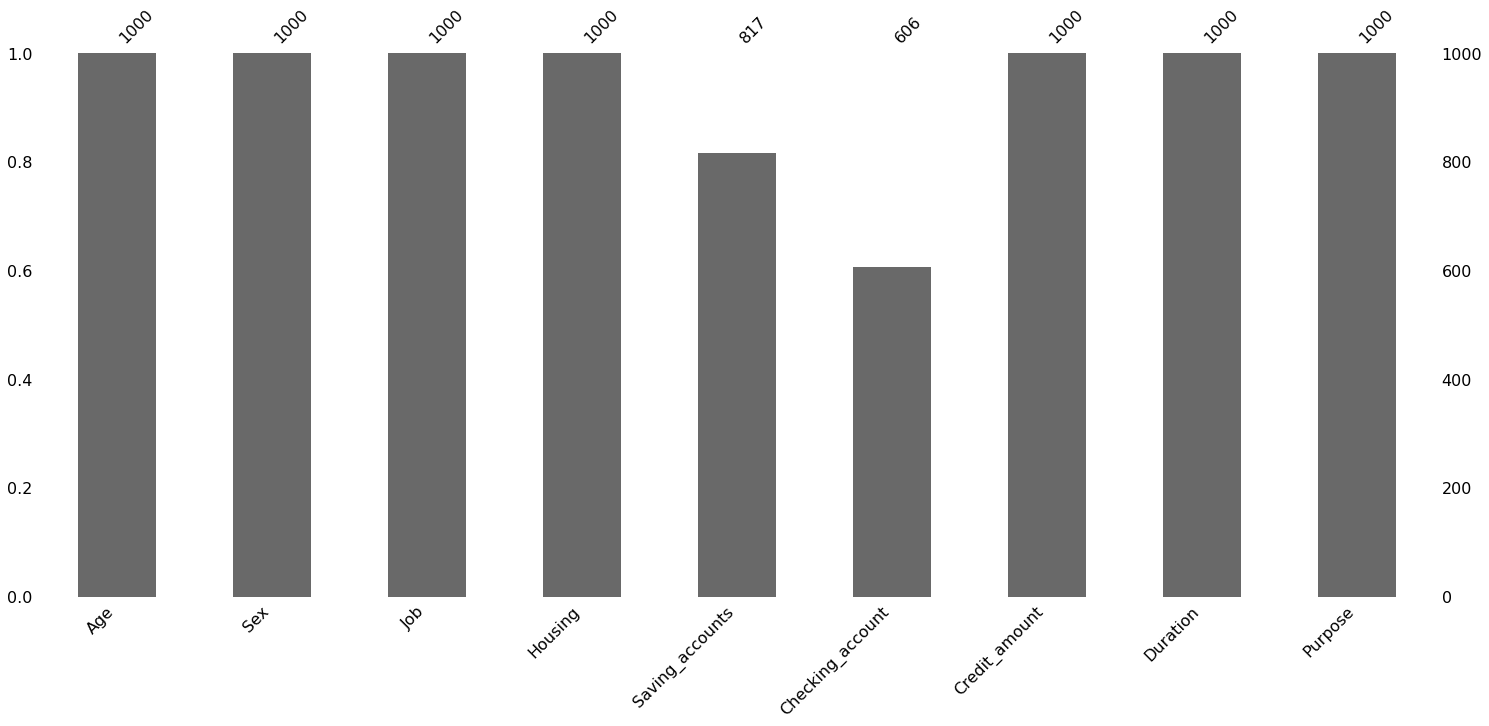

In [436]:
#Visulation of Missing Values
msno.bar(german_dataset)

***Finding Any Relation Between missing Values***

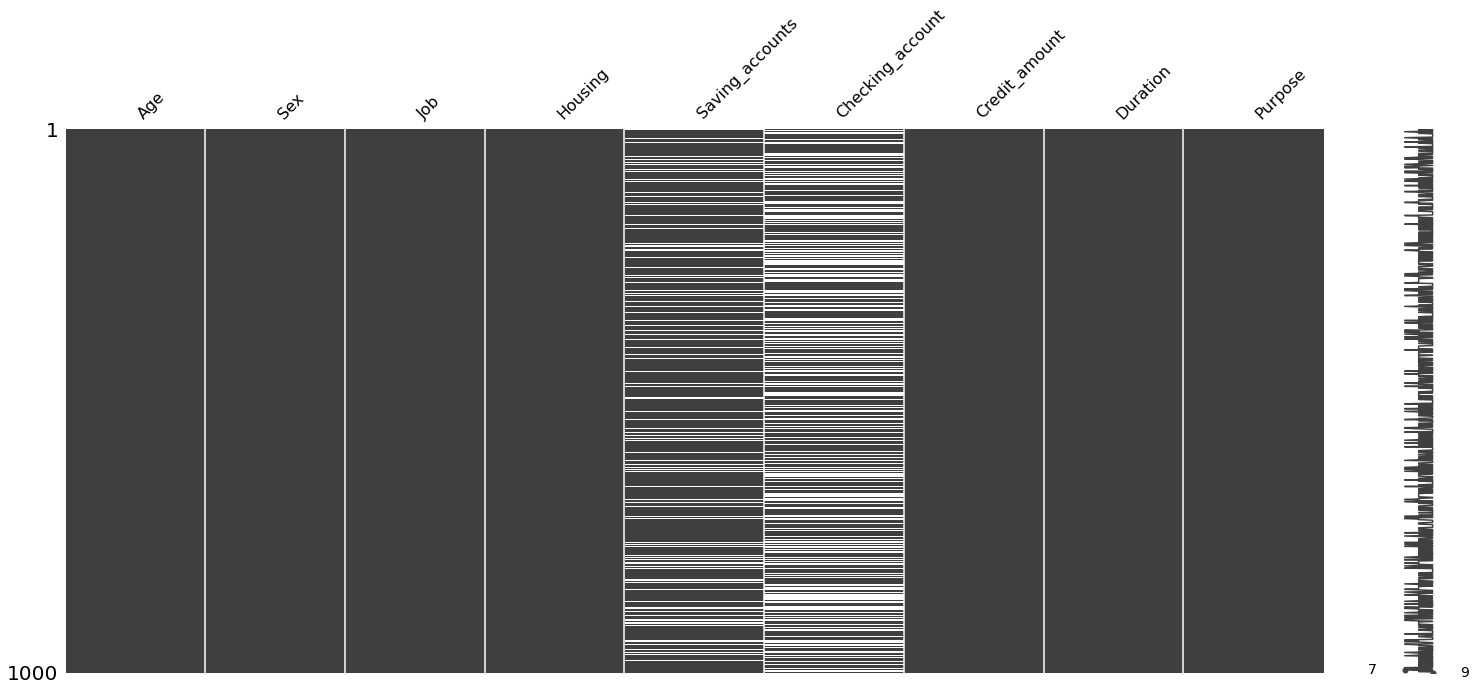

In [437]:
msno.matrix(german_dataset)

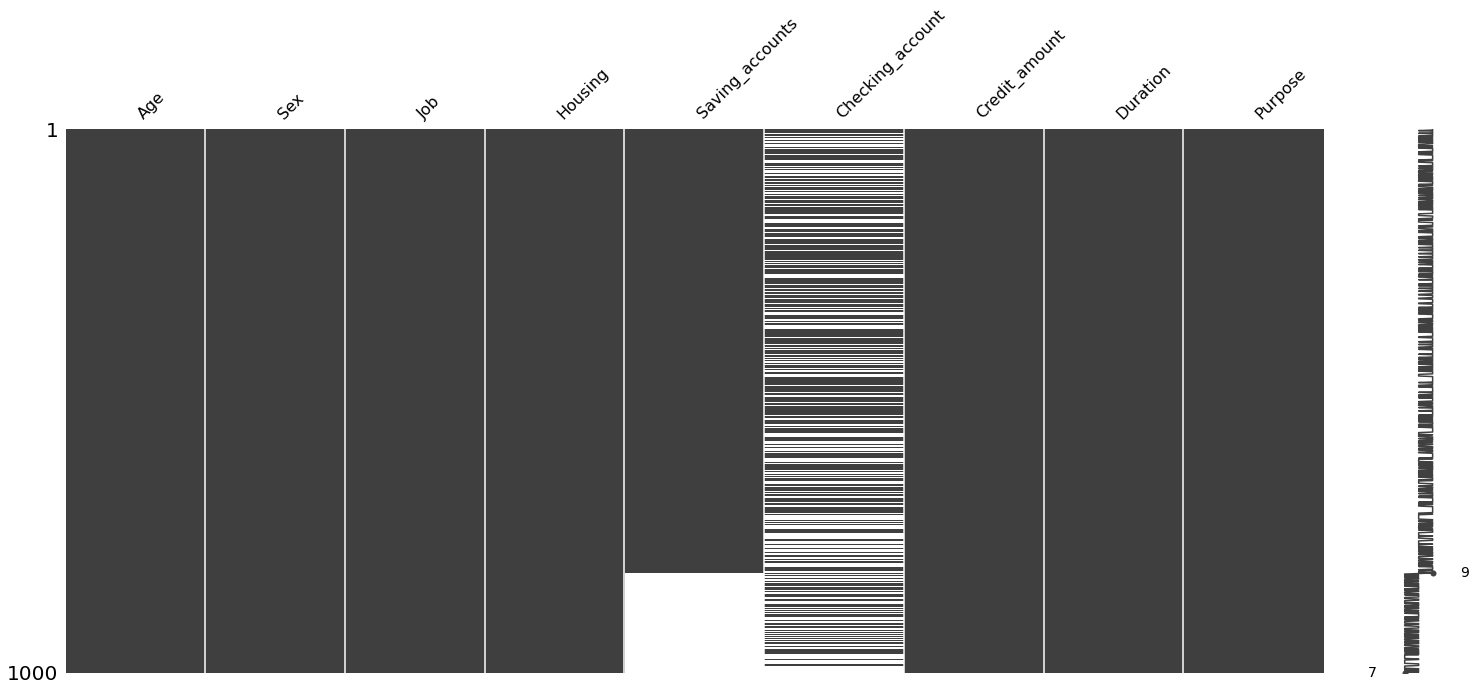

In [438]:
sort_saving = german_dataset.sort_values("Saving_accounts")
msno.matrix(sort_saving)

In above graph the white line are for null or missing values.

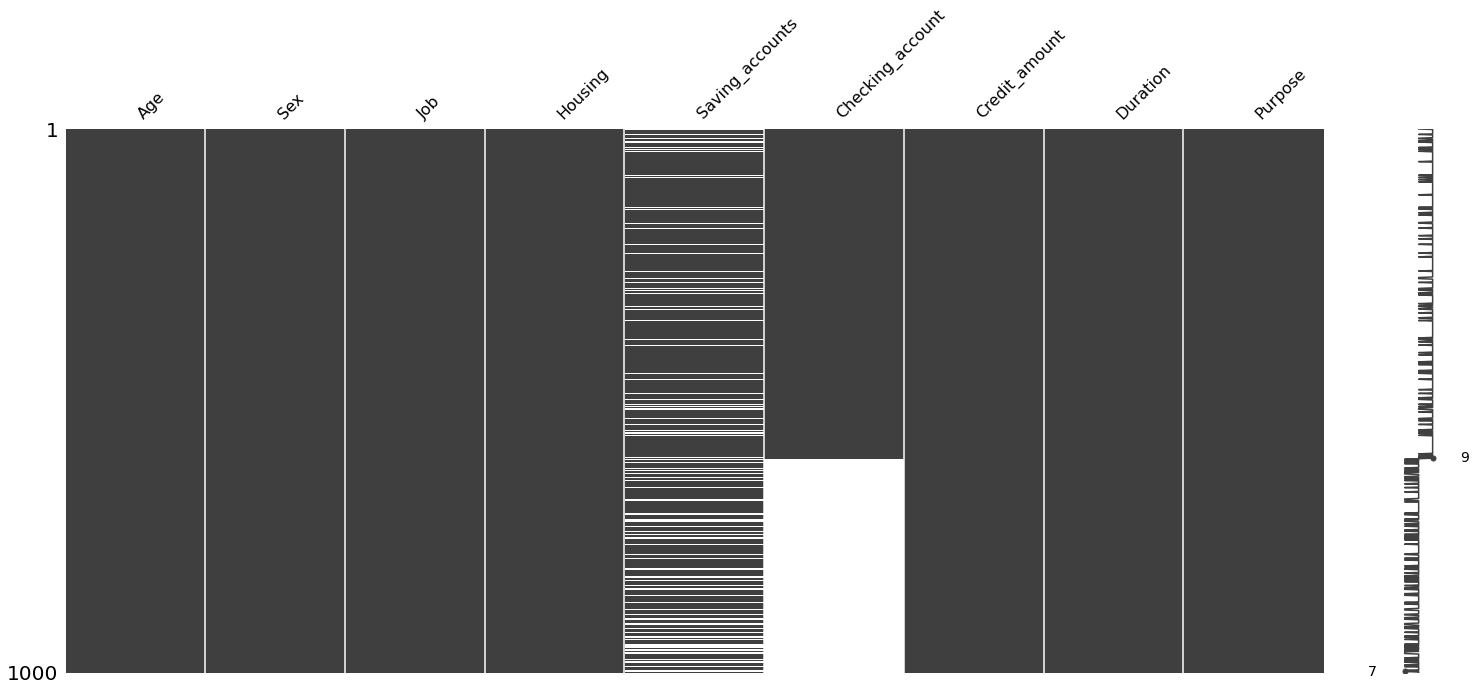

In [439]:
sort_checking = german_dataset.sort_values("Checking_account")
msno.matrix(sort_checking)

From Above two graphs we can find that there is no relation between the missing values for the the columns.

so missing at random data we can say that.


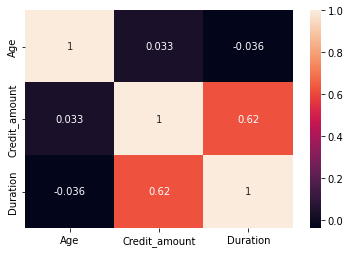

In [440]:
sns.heatmap(german_dataset.corr(),annot=True)

This variable are not co related

***Creating Dummy Values***

In [441]:
#Converting Male To 1 And Female to 0
german_dataset['Sex'] = german_dataset['Sex'].map({"male" : 1 , "female" : 0})

# Converting "Own" to 2 ,"rent" to 1, "free" to 0
german_dataset["Housing"] = german_dataset["Housing"].map({"own":2 ,"rent":1, "free" : 0})

# converting "little" to 0,"moderate" to 1, "quite rich" to 2,"rich" to 3
german_dataset["Saving_accounts"] = german_dataset["Saving_accounts"].map({"little":0,"moderate":1, "quite rich":2,"rich":3})

#Converting "little" to 0,"moderate" to 1,"rich" to 2
german_dataset["Checking_account"] = german_dataset["Checking_account"].map({"little":0,"moderate":1,"rich":2})

# Converting  car to 0, furniture/equipment to 1, radio/TV to 2, domestic appliances to 3, repairs to 4, education to 5, business to 6, vacation/others to 7
german_dataset["Purpose"] = german_dataset["Purpose"].map({"car":0,"furniture/equipment":1,"radio/TV":2,"domestic appliances":3,"repairs":4,
                                                           "education":5,"business":6,"vacation/others":7})
german_dataset

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,1,2,2,NaN,0.0,1169,6,2
1,22,0,2,2,0.0,1.0,5951,48,2
2,49,1,1,2,0.0,NaN,2096,12,5
3,45,1,2,0,0.0,0.0,7882,42,1
4,53,1,2,0,0.0,0.0,4870,24,0
...,...,...,...,...,...,...,...,...,...
995,31,0,1,2,0.0,NaN,1736,12,1
996,40,1,3,2,0.0,0.0,3857,30,0
997,38,1,2,2,0.0,NaN,804,12,2
998,23,1,2,0,0.0,0.0,1845,45,2


***Filling Null Values***

In [442]:
# Mode Imputation
from sklearn.impute import SimpleImputer
german_dataset_mode = german_dataset.copy(deep = True)
mode_imputer = SimpleImputer(strategy="most_frequent")
german_dataset_mode.iloc[:,:]= mode_imputer.fit_transform(german_dataset_mode)

In [443]:
# Median Imputation
from sklearn.impute import SimpleImputer
german_dataset_median = german_dataset.copy(deep = True)
median_imputer = SimpleImputer(strategy="median")
german_dataset_median.iloc[:,:]= median_imputer.fit_transform(german_dataset_median)

In [444]:
# Mean Imputation
from sklearn.impute import SimpleImputer
german_dataset_mean = german_dataset.copy(deep = True)
mean_imputer = SimpleImputer(strategy="mean")
german_dataset_mean.iloc[:,:]= mean_imputer.fit_transform(german_dataset_mean)

In [445]:
!pip install fancyimpute

In [446]:
from fancyimpute import KNN
knn_imputer = KNN()
german_dataset_knn = german_dataset.copy(deep = True) # Creating copy
german_dataset_knn.iloc[:,:] = knn_imputer.fit_transform(german_dataset_knn)

Imputing row 1/1000 with 1 missing, elapsed time: 0.189
Imputing row 101/1000 with 1 missing, elapsed time: 0.191
Imputing row 201/1000 with 1 missing, elapsed time: 0.193
Imputing row 301/1000 with 1 missing, elapsed time: 0.195
Imputing row 401/1000 with 1 missing, elapsed time: 0.197
Imputing row 501/1000 with 0 missing, elapsed time: 0.199
Imputing row 601/1000 with 0 missing, elapsed time: 0.201
Imputing row 701/1000 with 1 missing, elapsed time: 0.203
Imputing row 801/1000 with 1 missing, elapsed time: 0.205
Imputing row 901/1000 with 0 missing, elapsed time: 0.207


In [447]:
german_dataset_knn.head(5)

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67.0,1.0,2.0,2.0,0.355687,0.000000,1169.0,6.0,2.0
1,22.0,0.0,2.0,2.0,0.000000,1.000000,5951.0,48.0,2.0
2,49.0,1.0,1.0,2.0,0.000000,1.504345,2096.0,12.0,5.0
3,45.0,1.0,2.0,0.0,0.000000,0.000000,7882.0,42.0,1.0
4,53.0,1.0,2.0,0.0,0.000000,0.000000,4870.0,24.0,0.0


In [448]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
german_dataset_MICE = german_dataset.copy(deep = True)
german_dataset_MICE.iloc[:, :] = MICE_imputer.fit_transform(german_dataset_MICE)

In [449]:
german_dataset_MICE

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67.0,1.0,2.0,2.0,0.514179,0.000000,1169.0,6.0,2.0
1,22.0,0.0,2.0,2.0,0.000000,1.000000,5951.0,48.0,2.0
2,49.0,1.0,1.0,2.0,0.000000,0.788987,2096.0,12.0,5.0
3,45.0,1.0,2.0,0.0,0.000000,0.000000,7882.0,42.0,1.0
4,53.0,1.0,2.0,0.0,0.000000,0.000000,4870.0,24.0,0.0
...,...,...,...,...,...,...,...,...,...
995,31.0,0.0,1.0,2.0,0.000000,0.641056,1736.0,12.0,1.0
996,40.0,1.0,3.0,2.0,0.000000,0.000000,3857.0,30.0,0.0
997,38.0,1.0,2.0,2.0,0.000000,0.672251,804.0,12.0,2.0
998,23.0,1.0,2.0,0.0,0.000000,0.000000,1845.0,45.0,2.0


/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


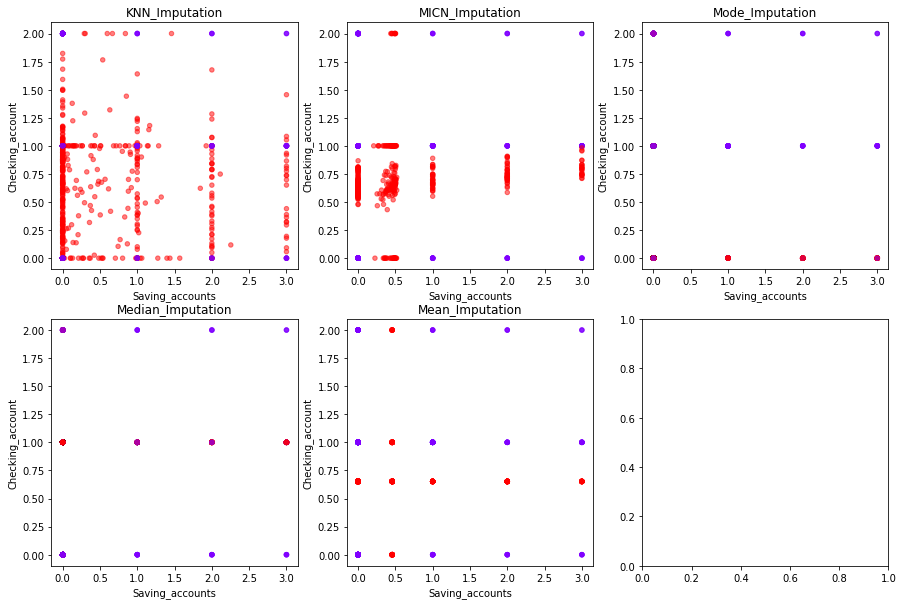

In [450]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
nullity = german_dataset["Saving_accounts"].isnull() + german_dataset["Checking_account"].isnull()
imputations = {"KNN_Imputation":german_dataset_knn,
               "MICN_Imputation":german_dataset_MICE,
               "Mode_Imputation":german_dataset_mode, 
               "Median_Imputation":german_dataset_median ,
               "Mean_Imputation":german_dataset_mean}

for ax, df_key in zip(axes.flatten(),imputations):
  imputations[df_key].plot(x = "Saving_accounts", y = "Checking_account",
                           kind = "scatter",alpha = 0.5, c= nullity,cmap = "rainbow",
                           ax=ax,colorbar = False, title = df_key)


KNN_Imputation gives better variablity of missing values as we can see from above.

***Looking For Unique Value in Saving and Checking account Column After Filling The Missing Values***

In [451]:
Saving_Account_KNN_unique = german_dataset_knn.Saving_accounts.unique()
Saving_Account_KNN_unique

array([0.35568665, 0.        , 0.90872618, 2.        , 3.        ,
       1.        , 0.25932169, 0.13240878, 0.79930966, 0.88227014,
       1.28645233, 1.01963594, 0.02517461, 0.38698448, 0.42398988,
       0.30214135, 0.15089679, 0.18061395, 1.39747583, 0.37554297,
       0.36967961, 1.13618876, 0.63212854, 0.83854394, 0.40940828,
       0.07726989, 0.76623864, 0.90467325, 0.32320789, 0.7064174 ,
       0.88958492, 0.10925919, 0.48190368, 0.18324153, 0.48389678,
       0.8437755 , 1.84491995, 2.25397805, 0.08270374, 1.06131732,
       0.28937623, 1.26636766, 1.10797305, 0.0479744 , 0.8669736 ,
       0.13925287, 0.42792806, 1.15528997, 0.21257266, 0.88004549,
       0.06563394, 1.92322865, 0.93227451, 0.09202306, 0.52194569,
       0.51552191, 0.8033127 , 1.01285881, 0.07304996, 0.37689525,
       0.21290065, 1.03906069, 0.97975154, 0.26366977, 0.50734711,
       0.85374697, 1.45890896, 1.05560485, 0.29574292, 0.42894228,
       0.12792497, 0.13918392, 0.10176609, 0.64207277, 2.11250

In [452]:
Checking_Account_KNN_unique = german_dataset_knn.Checking_account.unique()
Checking_Account_KNN_unique

array([0.        , 1.        , 1.5043446 , 0.92401635, 0.96470003,
       1.45518509, 0.58680556, 0.37709976, 0.58475525, 0.95113159,
       0.56461821, 2.        , 0.70121033, 0.5179287 , 0.88525498,
       0.6310526 , 0.25498886, 0.29618121, 1.02762103, 1.00568489,
       0.22640794, 0.40970681, 0.18646916, 0.19494186, 0.5837061 ,
       0.17730077, 0.29219571, 0.42493847, 0.45494174, 0.026665  ,
       0.9032005 , 0.94291457, 0.38861884, 0.88433007, 0.88529539,
       0.66447795, 0.78522458, 0.87010816, 0.89359575, 1.27156476,
       0.13692859, 0.88968454, 0.1008002 , 0.63580378, 0.60332154,
       0.78079401, 1.05730472, 0.6154245 , 0.45330931, 1.32009497,
       0.6976956 , 0.81456419, 0.36301394, 1.24482752, 1.00000001,
       0.87857036, 1.64024549, 0.91834156, 1.07580317, 0.27284034,
       0.79118957, 0.23195914, 0.17817464, 0.26708494, 0.8626779 ,
       0.15400823, 0.93385278, 0.2312964 , 0.29532273, 1.14078997,
       0.331015  , 1.28409302, 1.17487635, 0.95756148, 0.55114

Above we can see that the values are in float or in decimal we need the values in integer from as we assign dummy values as 0, 1, 2, 3.

In [453]:
# converting "little" to 0,"moderate" to 1, "quite rich" to 2,"rich" to 3

german_dataset_knn['Saving_accounts'] = np.where((german_dataset_knn['Saving_accounts'] >1.5) 
                                        & (german_dataset_knn['Saving_accounts'] < 2.5) ,2, german_dataset_knn['Saving_accounts'])

german_dataset_knn['Saving_accounts'] = np.where((german_dataset_knn['Saving_accounts'] <1.5) 
                                        & (german_dataset_knn['Saving_accounts'] > 0.5) ,1, german_dataset_knn['Saving_accounts'])

german_dataset_knn['Saving_accounts'] = np.where((german_dataset_knn['Saving_accounts'] <0.5),0, german_dataset_knn['Saving_accounts'])

german_dataset_knn['Saving_accounts'] = np.where((german_dataset_knn['Saving_accounts'] >2.5),3, german_dataset_knn['Saving_accounts'])

#Converting "little" to 0,"moderate" to 1,"rich" to 2

german_dataset_knn['Checking_account'] = np.where((german_dataset_knn['Checking_account'] <0.5),0, german_dataset_knn['Checking_account'])

german_dataset_knn['Checking_account'] = np.where((german_dataset_knn['Checking_account'] >0.5) 
                                        & (german_dataset_knn['Checking_account'] < 1.5) ,1, german_dataset_knn['Checking_account'])

german_dataset_knn['Checking_account'] = np.where((german_dataset_knn['Checking_account'] >1.5) 
                                        & (german_dataset_knn['Checking_account'] < 2.5) ,2, german_dataset_knn['Checking_account'])


In [454]:
german_dataset_knn

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67.0,1.0,2.0,2.0,0.0,0.0,1169.0,6.0,2.0
1,22.0,0.0,2.0,2.0,0.0,1.0,5951.0,48.0,2.0
2,49.0,1.0,1.0,2.0,0.0,2.0,2096.0,12.0,5.0
3,45.0,1.0,2.0,0.0,0.0,0.0,7882.0,42.0,1.0
4,53.0,1.0,2.0,0.0,0.0,0.0,4870.0,24.0,0.0
...,...,...,...,...,...,...,...,...,...
995,31.0,0.0,1.0,2.0,0.0,0.0,1736.0,12.0,1.0
996,40.0,1.0,3.0,2.0,0.0,0.0,3857.0,30.0,0.0
997,38.0,1.0,2.0,2.0,0.0,1.0,804.0,12.0,2.0
998,23.0,1.0,2.0,0.0,0.0,0.0,1845.0,45.0,2.0


In [455]:
Saving_Account_KNN_unique = german_dataset_knn.Saving_accounts.unique()
Saving_Account_KNN_unique

array([0., 1., 2., 3.])

In [456]:
Checking_Account_KNN_unique = german_dataset_knn.Checking_account.unique()
Checking_Account_KNN_unique

array([0., 1., 2.])

***Looking for Outiler***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


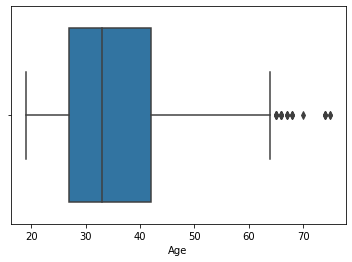

In [457]:

sns.boxplot(german_dataset_knn["Age"])

In [458]:
# IQR Score
Q1 =  np.percentile(german_dataset_knn["Age"],25, interpolation="midpoint")
Q2 =  np.percentile(german_dataset_knn["Age"],50, interpolation="midpoint")
Q3 =  np.percentile(german_dataset_knn["Age"],75, interpolation="midpoint")

IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
extrem_upper_limit = Q3 + 3*IQR
extrem_lower_limit = Q1 - 3*IQR
outlier = []
for x in german_dataset_knn["Age"]:
  if ((x>upper_limit) or (x< lower_limit)):
    outlier.append(x)
print(outlier) 

[67.0, 66.0, 66.0, 70.0, 65.0, 74.0, 68.0, 66.0, 75.0, 74.0, 65.0, 75.0, 67.0, 74.0, 65.0, 66.0, 74.0, 66.0, 67.0, 65.0, 68.0, 65.0, 68.0]


In [459]:
# Z Score:- Basically standard normal distribution
from scipy import stats
z = np.abs(stats.zscore(german_dataset_knn["Age"]))
print(z)

[2.76645648 1.19140394 1.18331231 0.8315025  1.53512213 0.04802204
 1.53512213 0.04802204 2.23874176 0.66368922 0.92754658 1.01549903
 1.19140394 2.15078931 0.66368922 0.3118794  1.53512213 0.92754658
 0.74355005 0.39983186 1.09535986 0.74355005 1.09535986 0.74355005
 0.83959412 0.03993041 0.30378778 0.56764514 0.13597449 2.41464667
 0.03993041 0.75164167 0.48778431 1.88693195 0.22392695 0.92754658
 0.39983186 0.12788287 0.12788287 1.01549903 0.48778431 0.83959412
 0.74355005 1.01549903 1.9748844  0.04802204 0.30378778 1.10345149
 0.30378778 0.66368922 0.57573676 0.48778431 0.92754658 0.39983186
 1.88693195 0.83959412 1.44716968 0.39983186 1.10345149 1.10345149
 0.75164167 1.27126477 2.23874176 0.92754658 0.83959412 1.09535986
 0.57573676 1.19140394 0.12788287 0.92754658 0.48778431 0.91945495
 1.35921722 0.47969268 0.39174023 2.67850403 0.13597449 1.35921722
 0.30378778 1.19140394 0.74355005 1.00740741 1.01549903 1.9748844
 1.44716968 0.57573676 0.75164167 1.00740741 0.48778431 0.66368

In [460]:
thershold = 3
print(np.where(z>3))

(array([163, 186, 330, 430, 536, 606, 756]),)


In [461]:
thershold = -3
print(np.where(z<-3))

(array([], dtype=int64),)


From above grapg we can see that there are some outliers are present. The outliers are present above 65 age.

**Removing The Outliers**

In [462]:
index_no = german_dataset_knn[german_dataset_knn['Age']> 64 ].index
print(index_no)
german_dataset_knn.drop(index_no,inplace=True) 
print(german_dataset_knn)

Int64Index([  0,  75, 137, 163, 179, 186, 187, 213, 330, 430, 438, 536, 554,
            606, 624, 723, 756, 774, 779, 807, 846, 883, 917],
           dtype='int64')
      Age  Sex  Job  ...  Credit_amount  Duration  Purpose
1    22.0  0.0  2.0  ...         5951.0      48.0      2.0
2    49.0  1.0  1.0  ...         2096.0      12.0      5.0
3    45.0  1.0  2.0  ...         7882.0      42.0      1.0
4    53.0  1.0  2.0  ...         4870.0      24.0      0.0
5    35.0  1.0  1.0  ...         9055.0      36.0      5.0
..    ...  ...  ...  ...            ...       ...      ...
995  31.0  0.0  1.0  ...         1736.0      12.0      1.0
996  40.0  1.0  3.0  ...         3857.0      30.0      0.0
997  38.0  1.0  2.0  ...          804.0      12.0      2.0
998  23.0  1.0  2.0  ...         1845.0      45.0      2.0
999  27.0  1.0  2.0  ...         4576.0      45.0      0.0

[977 rows x 9 columns]


In [463]:
german_dataset_knn

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
1,22.0,0.0,2.0,2.0,0.0,1.0,5951.0,48.0,2.0
2,49.0,1.0,1.0,2.0,0.0,2.0,2096.0,12.0,5.0
3,45.0,1.0,2.0,0.0,0.0,0.0,7882.0,42.0,1.0
4,53.0,1.0,2.0,0.0,0.0,0.0,4870.0,24.0,0.0
5,35.0,1.0,1.0,0.0,1.0,1.0,9055.0,36.0,5.0
...,...,...,...,...,...,...,...,...,...
995,31.0,0.0,1.0,2.0,0.0,0.0,1736.0,12.0,1.0
996,40.0,1.0,3.0,2.0,0.0,0.0,3857.0,30.0,0.0
997,38.0,1.0,2.0,2.0,0.0,1.0,804.0,12.0,2.0
998,23.0,1.0,2.0,0.0,0.0,0.0,1845.0,45.0,2.0


***Check For Skewness***

In [464]:
german_dataset_knn["Age"].skew()

0.8319217527795401

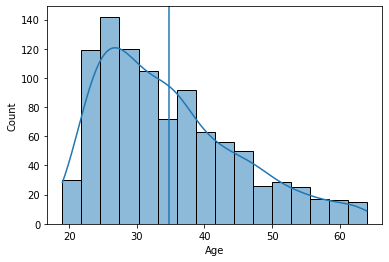

In [465]:
sns.histplot(german_dataset_knn["Age"] , kde = True)
plt.axvline(x = german_dataset_knn.Age.mean(), label = "Mean")

***Transforming The Skewed data to normilized data***

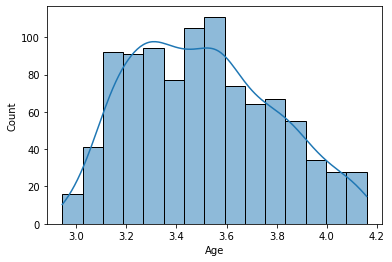

In [466]:
l = np.log(german_dataset_knn["Age"])
sns.histplot(l,kde=True)

In [467]:
#REplacing the original data with the transformed data
german_dataset_knn["Age"] = l

**Data Visulation**

***Distribution of numerical variables***

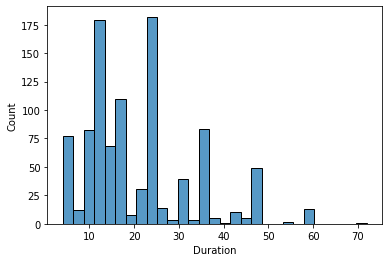

In [468]:
sns.histplot(x = "Duration",data= german_dataset_knn)

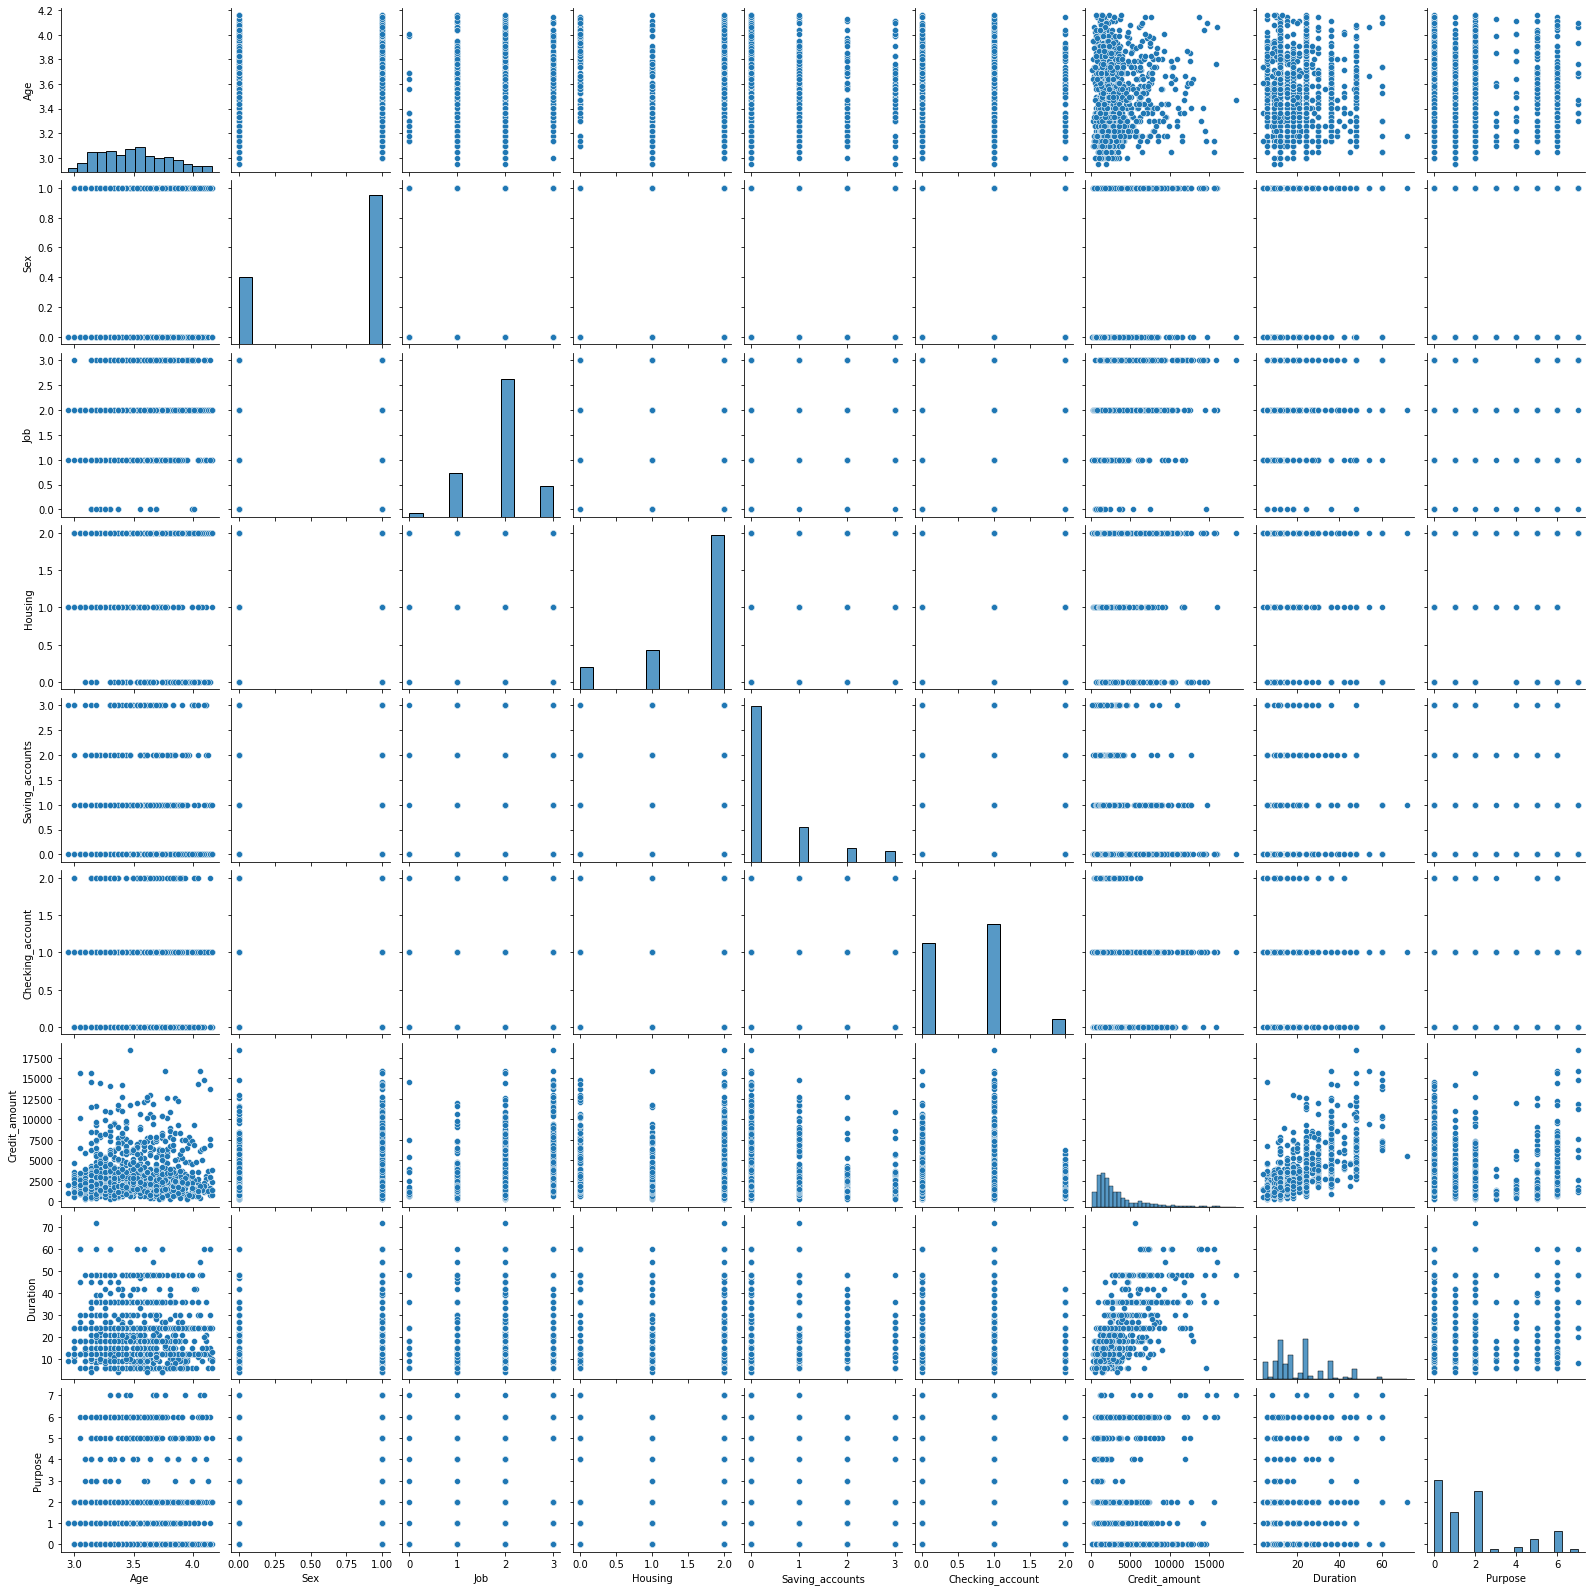

In [469]:
sns.pairplot(german_dataset_knn)

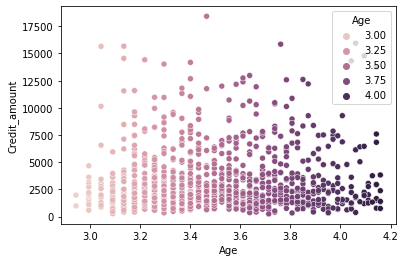

In [470]:
sns.scatterplot(x = "Age", y = "Credit_amount",data=german_dataset_knn,hue="Age")

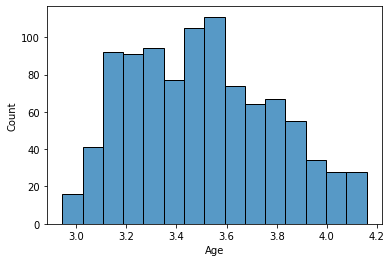

In [471]:
sns.histplot(x = "Age",data=german_dataset_knn)

***Distribution of categorical variables***

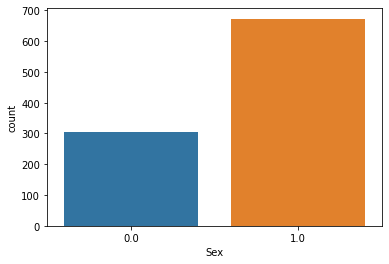

In [472]:
sns.countplot(x= "Sex",data=german_dataset_knn)

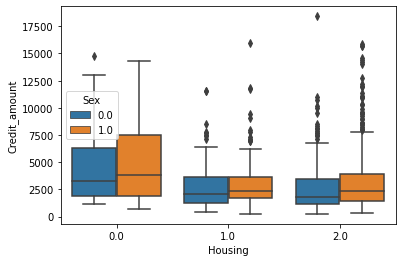

In [473]:
sns.boxplot(x = "Housing",y = "Credit_amount",data= german_dataset_knn, hue ="Sex")

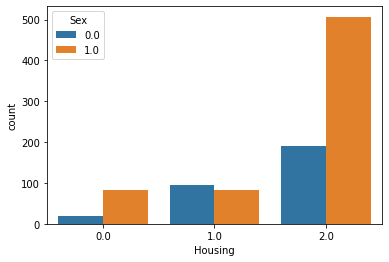

In [474]:
sns.countplot(x = "Housing",data= german_dataset_knn, hue ="Sex")

Form Above we can see that more population have own house

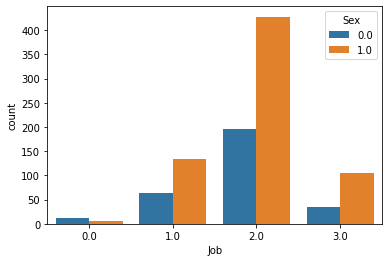

In [475]:
sns.countplot(x = "Job",data= german_dataset_knn, hue ="Sex")

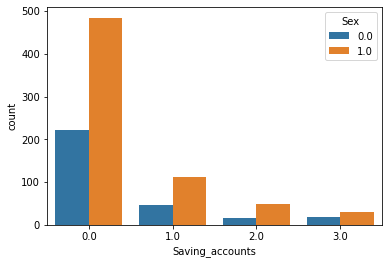

In [476]:
sns.countplot(x = "Saving_accounts",data= german_dataset_knn, hue ="Sex")

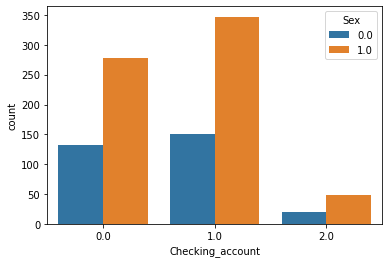

In [477]:
sns.countplot(x = "Checking_account",data= german_dataset_knn, hue ="Sex")

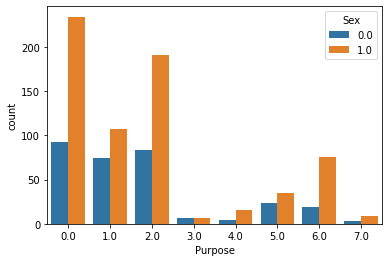

In [478]:
sns.countplot(x = "Purpose",data= german_dataset_knn, hue ="Sex")

previously converted purpose :- car to 0, furniture/equipment to 1, radio/TV to 2, domestic appliances to 3, repairs to 4, education to 5, business to 6, vacation/others to 7

***Numerical vs Categorical plots***


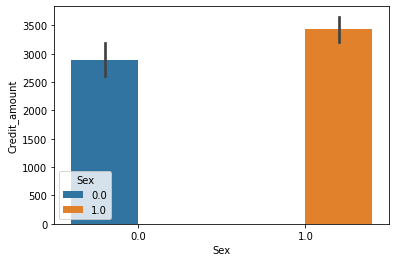

In [479]:
sns.barplot(x = "Sex",y = "Credit_amount", data = german_dataset_knn  , hue = "Sex")

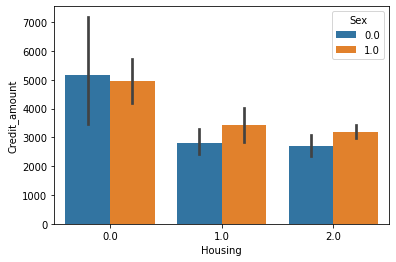

In [480]:
sns.barplot(x = "Housing",y = "Credit_amount", data = german_dataset_knn  , hue = "Sex")


***Numerical vs Numerical plots***

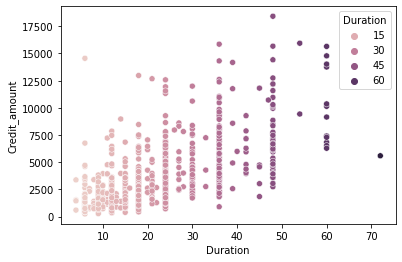

In [481]:
sns.scatterplot(y = "Credit_amount", x = "Duration", data= german_dataset_knn, hue = "Duration")

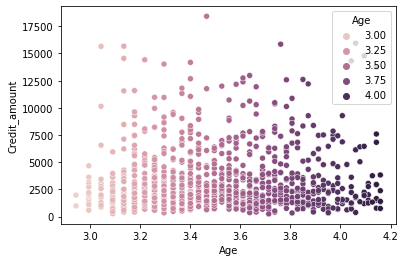

In [482]:
sns.scatterplot(y = "Credit_amount", x = "Age", data= german_dataset_knn, hue = "Age")

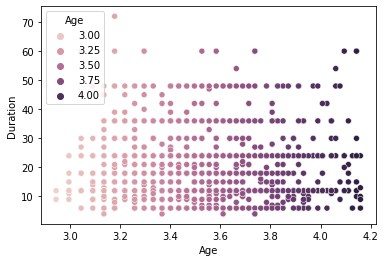

In [483]:
sns.scatterplot(y = "Duration", x = "Age", data= german_dataset_knn, hue = "Age")